<a href="https://colab.research.google.com/github/gwegayhu/Data-Science-Research/blob/master/ML_Model_for_Optimized_Agronomy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ML Model for Optimized Agronomy

The project aims to create a geospatial tool that helps farmers optimize their agricultural practices by recommending optimal planting schedules and fertilizer application rates. This involves integrating various data sources, including soil quality maps, weather forecasts, and historical crop performance data.

Data Considerations

Since we're using synthetic data, we'll need to generate realistic datasets for soil quality, weather, and historical crop performance. This can be achieved using techniques like:

Soil Quality Simulation: Generate synthetic soil data based on known soil types, nutrient profiles, and spatial distributions. Consider factors like soil texture, pH, organic matter content, and nutrient levels.
Weather Data Generation: Use historical weather data and climate models to generate synthetic weather patterns, including temperature, precipitation, humidity, and solar radiation.
Crop Performance Simulation: Simulate crop yields based on various factors, including soil quality, weather conditions, planting dates, and fertilizer application rates. This can involve using crop growth models or statistical methods.

Mean Squared Error: 29.71446161348167


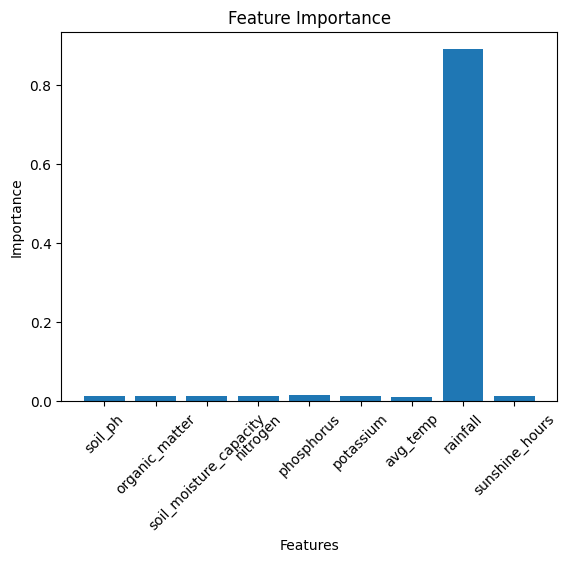

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt # Import matplotlib.pyplotimport pandas as pd
import seaborn as sns
import statsmodels.api as sm # Import statsmodels.api and alias it as 'sm'

# Define synthetic data generation functions
def generate_soil_quality(num_samples):
    """
    Generates synthetic soil quality data.

    Args:
        num_samples: Number of samples to generate.

    Returns:
        pandas.DataFrame: DataFrame containing soil quality features.
    """
    soil_data = {
        'soil_ph': np.random.uniform(5.5, 8.5, num_samples),
        'organic_matter': np.random.uniform(1, 5, num_samples),
        'soil_moisture_capacity': np.random.uniform(0.05, 0.4, num_samples),
        'nitrogen': np.random.uniform(10, 50, num_samples),
        'phosphorus': np.random.uniform(5, 30, num_samples),
        'potassium': np.random.uniform(5, 50, num_samples)
    }
    return pd.DataFrame(soil_data)

def generate_weather_data(num_samples):
    """
    Generates synthetic weather data.

    Args:
        num_samples: Number of samples to generate.

    Returns:
        pandas.DataFrame: DataFrame containing weather features.
    """
    weather_data = {
        'avg_temp': np.random.uniform(15, 35, num_samples),
        'rainfall': np.random.uniform(0, 150, num_samples),
        'sunshine_hours': np.random.uniform(8, 14, num_samples)
    }
    return pd.DataFrame(weather_data)

def generate_crop_performance(soil_data, weather_data, num_samples):
    """
    Generates synthetic crop performance data based on soil and weather conditions.

    Args:
        soil_data: DataFrame containing soil quality features.
        weather_data: DataFrame containing weather features.
        num_samples: Number of samples to generate.

    Returns:
        pandas.DataFrame: DataFrame containing crop performance features.
    """
    # Simplified calculation for yield (replace with a more complex model if needed)
    yield_data = 0.5 * soil_data['organic_matter'] + 0.3 * weather_data['rainfall'] - 0.1 * weather_data['avg_temp']
    yield_data += np.random.normal(0, 5, num_samples)  # Add noise to simulate real-world variability
    return pd.DataFrame({'yield': yield_data})

# Generate synthetic data
num_samples = 1000
soil_data = generate_soil_quality(num_samples)
weather_data = generate_weather_data(num_samples)
crop_performance = generate_crop_performance(soil_data, weather_data, num_samples)

# Combine data
data = pd.concat([soil_data, weather_data, crop_performance], axis=1)

# Split data into features and target
X = data.drop('yield', axis=1)
y = data['yield']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)  # Set random_state for reproducibility
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualize feature importance (optional)
importances = rf_model.feature_importances_
feature_names = X.columns
plt.bar(feature_names, importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

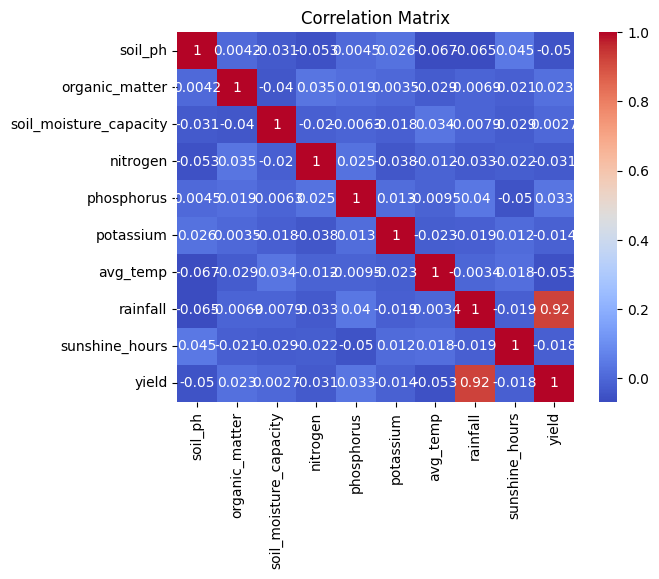

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
correlation_matrix = data.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
X = data[["soil_ph", "organic_matter", "avg_temp", "rainfall"]]  # Independent variables
y = data["yield"]  # Dependent variable
X = sm.add_constant(X)  # Add a constant term for the intercept

In [ ]:
model = sm.OLS(y, X).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1679.
Date:                Sun, 19 Jan 2025   Prob (F-statistic):               0.00
Time:                        19:48:49   Log-Likelihood:                -3048.3
No. Observations:                1000   AIC:                             6107.
Df Residuals:                     995   BIC:                             6131.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.2239      1.546     -1.